# *Interest Point: Detect, Extract, Describe and Matching* bagian 2

Pada pembahasan yang kedua ini, saya akan coba menjelaskan beberapa metode *interest point* yang sudah sangat populer, seperti SIFT, SURF, BRISK dan lain-lain. Beberapa metode ini sudah dipatenkan sehingga untuk dapat menggunakan metode ini, pastikan kalian sudah menginstall opencv-contrib dari link [berikut](https://www.scivision.co/install-opencv-python-windows/).

Deskriptor *Interest point* merupakan salah satu metode yang digunakan untuk mengambil sebuah fitur pada citra dengan melihat dari *pixel-pixel* tetanggannya. *Interest point* bisa jugaq disebut dengan *keypoints*. Seperti yang dijelaskan pada *Panduan Visi Komputer*, metode deskriptor *interest point* ini terbagi menjadi dua kategori yakni:

1. *Sparse descriptor*
2. *Dense descriptor*

### 1 *Sparse Descriptor*

Langkah-langkah pada kategori ini adalah:
1. mencari kandidat *keypoint* pada *local patch* dengan menggunakana *image pyramid* seperti *Difference of Gaussian*
2. melakukan seleksi kandidat *keypoint* (opsional)
3. ekstraksi fitur dari titik *keypoint*
4. mendeskripsikan fitur dalam bentuk vektor

contoh dari *sparse descriptor* antara lain seperti SIFT, SURF, BRISK, FAST dan ORB (semua tersedia pada *Opencv*)

#### 1.1 SIFT (*Scale Invariant Features Transform*)

Disini saya hanya akan menjelaskan bagaimana cara menggunakan metode SIFT dari opencv. Untuk lebih jelasnya bagaimana algoritme ini bekerja atau *pseudocode*nya bisa membuka buku *Panduan Visi Komputer*.

Pertama yang perlu diperhatikan adalah metode ini berada pada modul *cv2.xfeatures2d* (Bisa kalian lihat dari link [berikut](https://github.com/opencv/opencv_contrib/tree/master/modules/xfeatures2d))

```python
cv2.xfeatures2d.SIFT(nfeatures=None, nOctaveLayers=None, contrastThreshold=None, edgeThreshold=None, sigma=None)
```

Method tersebut mempunyai beberapa parameter antara lain:
1. nfeatures = jumlah fitur yang ingin diambil berdasarkan peringkatnya
2. nOctaveLayers = jumlah layer pada masing-masing octave
3. contrastThreshold = nilai ambang batas untuk menyeleksi kandidat fitur yang berada dilokasi *low-contrast*. Semakin besar nilainya, maka semakin sedikit fitur yang lolos
4. edgeThreshold = nilai ambang batas untuk menyeleksi kandidat fitur yang berada ditepi
5. sigma = merupakan nilai sigma yang diaplikan pada *gaussian weighting*

Untuk implementasinya seperti berikut ini:

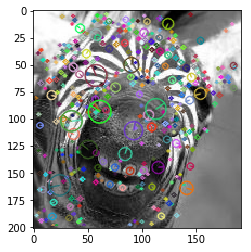

In [1]:
import cv2
import matplotlib.pyplot as plt 

img = cv2.imread("Asset/gambar.jpg", 0) 
# Citra yang dapat diproses hanya pada citra dengan 1 channel

sift_descriptor = cv2.xfeatures2d.SIFT_create()

keypoints = sift_descriptor.detect(img, None)
# Digunakan untuk mencari keypoints dari citra yang diberikan

img_draw = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img_draw)
plt.show()
# Hasilnya zebra kece!

*Informasi apa aja sih yang ada di keypoints itu?*

Langkahnya adala sebagai berikut: 
1. Yang perlu kita ketahui adalah tipe datanya terlebih dahulu.
2. Jika *keypoints* tersebut adalah *list* maka kita perlu mengambil salah satunya saja. Sebagai contoh indeks ke-0 saja yang kita ambil. Jika *keypoints* bukan merupakan *list* maka kita bisa langsung melakukan *inspect* terhadap variabel tersebut.

In [2]:
print("tipe data: ",type(keypoints))
# Hasilnya list. Sekarang coba akses elemen pertamanya atau indeks ke-0
print("tipe data indeks-0", type(keypoints[0]))
# Oke hasilnya cv2.Keypoint. Sekarang bisa dilakukan inspect

import inspect # Untuk melakukan inspect terhadap kelas atau objek
# Baris dibawah ini akan menampilkan setiap atribut pada kelas atau objek yang di-inspect
# dimana yang ditampilkan bukanlah built-in method atau method-wrapper
# yang biasanya dimulai dengan tanda __ (double underscore). Contoh: __str__
[(atribut) for atribut in inspect.getmembers(keypoints[0]) if not(atribut[0].startswith('__') and atribut[0].endswith('__'))]

# Di luar notebook, gunakan yang dibawah ini
# [print (atribut) for atribut in inspect.getmembers(keypoints[0]) if not(atribut[0].startswith('__') and atribut[0].endswith('__'))]

tipe data:  <class 'list'>
tipe data indeks-0 <class 'cv2.KeyPoint'>


[('angle', 177.704345703125),
 ('class_id', -1),
 ('octave', 4719103),
 ('pt', (102.3184585571289, 4.7026286125183105)),
 ('response', 0.020043525844812393),
 ('size', 1.9168967008590698)]

Dari informasi yang diperoleh, atribut tersebut dapat digunakan untuk hal yang lain jika mau. Keterangan atributnya adalah sebagai berikut:
1. angle = merupakan orientasi dari keypoint tersebut
2. class_id = digunakan jika keypoint perlu di *clustering*. Jika tidak, semua *keypoint* bernilai -1
3. octave = nilai pada octave ke berapa *keypoint* tersebut diekstraksi
4. pt = lokasi (x,y) tempat *keypoint* tersebut diekstraksi
5. response = respon dari *keypoint*. Urutan *keypoint* yang dihasilkan berdasarkan nilai respon yang paling besar
6. size = nilai diameter *keypoint*

Untuk informasi *keypoint* yang dijelaskan di atas silahkan digunakan sebaik mungkin. Untuk penggunaan dari SIFT akan dirangkum pada berkas *Digital Image Processing-3*

#### 1.1.2 SURF (*Speeded-Up Robust Features*)

Sama seperti SIFT, disini saya hanya akan menjelaskan cara menggunakan metode SURF yang sudah disediakan oleh OpenCV.

```python
cv2.xfeatures2d.SURF_create(hessianThreshold=None, nOctaves=None, nOctaveLayers=None, extended=None, upright=None)
```

Berikut adalah penjelasan dari masing-masing parameter:
1. hessianThreshold = merupakan nilai ambang batas untuk menyeleksi *keypoint* berdasarkan nilai determinan dari matriks *hessian*. Berbeda dengan SIFT yang bisa menentukan berapa jumlah dari *keypoint* yang dibutuhkan, SURF merupakan metode yang mengekstraksi banyak *keypoint*.
2. nOctaves =  jumlah octaves yang digunakan
3. nOctaveLayers = jumlah layer pada masing-masing octave
4. extended = merupakan flag untuk deskriptor. Jika diisi True, maka akan menghasilkan 128-*element descriptors*, jika False maka akan menghasilkan 64-*element descriptors*
5. upright = bernilai False jika ingin fitur memiliki rotasi, bernilai True jika tidak ingin ada orientasi pada fitur

Untuk implementasinya adalah sebagai berikut:

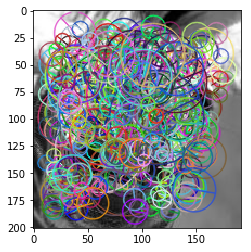

In [3]:
surf_descriptor = cv2.xfeatures2d.SURF_create()

keypoints = surf_descriptor.detect(img, None)
# Digunakan untuk mencari keypoints dari citra yang diberikan

img_draw = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img_draw)
plt.show()
# Hasilnya seperti kumpulan karet!

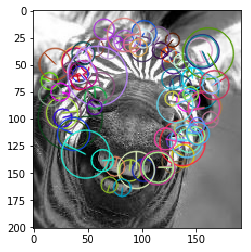

In [4]:
# Karena menghasilkan banyak keypoint, maka kita berikan threshold pada nilai hessian matriksnya
surf_descriptor = cv2.xfeatures2d.SURF_create(hessianThreshold=5000)

keypoints = surf_descriptor.detect(img, None)
# Digunakan untuk mencari keypoints dari citra yang diberikan

img_draw = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img_draw)
plt.show()
# Hasilnya tampak lebih sedikit keypoints

Untuk melihat isi dari masing-masing keypoint, bisa menggunakan kode berikut:
```python
for kp in keypoints:
    [print(n) for n in inspect.getmembers(kp) if not(n[0].startswith('__') and n[0].endswith('__'))]
```

Silahkan dicoba sendiri untuk penggunakan masing-masing parameter yang sudah dijelaskan di atas.


#### 1.1.3 FAST (*Features from Accelerated Segment Test*)

Metode FAST juga termasuk sebagai metode deskriptor *interest point* yang disediakan oleh OpenCV. Berbeda dengan SIFT dan SURF, FAST tersedia selain dari versi contrib. FAST sering digunakan karena komputasinya yang lebih sederhana dibanding SIFT.

Berikut adalah cara mengimplementasikannya:
```python
cv2.FastFeatureDetector_create(threshold=None, nonmaxSuppression=None, type=None)
```
Masing-masing parameternya berfungsi sebagai berikut:
1. threshold = nilai ambang batas yang digunakan untuk dibandingkan dengan *pixel* tetangganya
2. nonmaxSuppression = bernilai False atau True. True, maka *non-maximum suppression* akan dijalankan. False untuk sebaliknya
3. type = jumlah *pixel* tetangga. Nilai yang bisa diinputkan cv2.FastFeatureDetector_TYPE_5_8, cv2.FastFeatureDetector_TYPE_7_12, cv2.FastFeatureDetector_TYPE_9_16 atau 0, 1, 2

Di bawah ini adalah contoh dari implementasinya:

Threshold:  30
nonmaxSuppression:  True
neighborhood:  1
Total Keypoints with nonmaxSuppression:  453


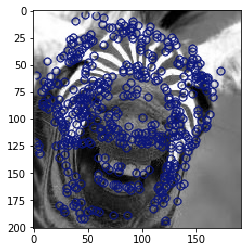

In [23]:
fast_desc = cv2.FastFeatureDetector_create(threshold=30,nonmaxSuppression=120, type=cv2.FAST_FEATURE_DETECTOR_TYPE_7_12)

keypoints_fast = fast_desc.detect(img, None)

print ("Threshold: ", fast_desc.getThreshold())
print ("nonmaxSuppression: ", fast_desc.getNonmaxSuppression())
print ("neighborhood: ", fast_desc.getType())
print ("Total Keypoints with nonmaxSuppression: ", len(keypoints_fast))

img_draw = cv2.drawKeypoints(img, keypoints_fast, None, (10, 20, 120), 4)

plt.imshow(img_draw)
plt.show()
# Sedikit menyeramkan!

#### 1.1.4 BRIEF (*Binary RObust Independent Elementary Features*)

BRIEF merupakan metode deskriptor *interest point* yang menggunakan *binary strings*. Untuk implementasi pada OpenCV, *library* ini hanya menyediakan fungsi untuk menghitung berdasarkan set *keypoint* yang sudah ada. Bisa menggunakan metode *detect* dari SIFT, SURF, FAST atau yang lain.
Sekilas, perbedaan metode *detect* dengan *compute* adalah metode *detect* hanya mendeteksi posisi dari *keypoint* serta artibutnya (arah, respon, diameter dan octave). Sedangkan metode *compute* digunakan untuk membuat sebuah deskripsi. Nilai yang diberikan adalah *keypoint* dan deskripsinya. Fungsi dari deskripsi ini digunakan pada proses *matching* yang akan dijelaskan pada *notebook* ketiga.

Untuk mengimplementasikannya:

```python
cv2.xfeatures2d.BriefDescriptorExtractor_create(bytes=None, use_orientation=None)
```
Masing-masing parameternya berfungsi sebagai berikut:
1. bytes = *bytes* pada *binary strings* yang digunakan. Nilai yang dapat digunakan adalah 16, 32, dan 64
2. use_orientation = bernilai False jika tidak menggunakan orientasi dan True jika sebaliknya

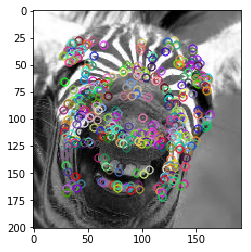

In [38]:
brief_desc = cv2.xfeatures2d.BriefDescriptorExtractor_create()

keypoints_brief, desc_brief = brief_desc.compute(img, keypoints_fast)

img_draw = cv2.drawKeypoints(img, keypoints_brief, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_draw)
plt.show()

# Hilangkan tanda tagar jika ingin melihat hasil dari deskriptor dan keypointnya
# print("Descriptors")
# for index,des in enumerate(desc_brief):
#    print(index, " ", des)

#print("Keypoints")
#for index, kp in enumerate(keypoints_brief):
#    print(index," ", sep=' ', end='', flush=True)
#    [print("\t",n) for n in inspect.getmembers(kp) if not(n[0].startswith('__') and n[0].endswith('__'))]


#### 1.1.5 ORB (*Oriented FAST and Rotated BRIEF*)
ORB merupakan kombinasi FAST dan BRIEF yang telah diperbaiki sehingga membuatnya lebih *invariant* terhadap rotasi. ORB ini tidak lain adalah fusi dari kedua metode tersebut dan bukan metode yang dipatenkan sehingga dapat diperoleh tanpa menggunakan modul contrib. *Improvement* yang diberikan juga lebih baik dari keduanya. Penjelasan lebih jelas ada pad abuku *Panduan Visi Komputer*. Berikut adalah cara mengimplementasikan ORB pada Python menggunakan OpenCV.

Untuk mengimplementasikannya:
```python
cv2.ORB_create(nfeatures=None, scaleFactor=None, nlevels=None, edgeThreshold=None, firstLevel=None, WTA_K=None, scoreType=None, patchSize=None, fastThreshold=None)
```
Masing-masing parameternya berfungsi sebagai berikut:
1. nfeatures = jumlah (maksimal) fitur yang ingin diambil
2. scaleFactor = faktor perubaha skala pada *image pyramid* (nilai > 1, setiap *level* punya nilai\* 2 *pixel* lebih sedikit dari *level* sebelumnya). Semakin besar nilai faktor skala maka akan menurunkan skor pemadanan (*matching score*). Jika semakin kecil maka membutuhkan jumlah piramid yang banyak serta komputasi yang lama
3. nlevels = jumlah *level* pada pyramid
4. edgeThreshold = ukuran tepi dimana lokasi tersebut tidak akan dianggap sebagai fitur
5. firstLevel = selalu bernilai 1
6. WTA_K = jumlah titik yang diambil dari bin *oriented* BRIEF. Titik ini diambil secara acak dengan *seed* yang telah ditentukan sebelumnya. Nilai yang bisa digunakan adalah 2, 3, 4 
7. scoreType = algoritme yang digunakan untuk melakukan *ranking* fitur. Secara default menggunakan algoritme Harris (```cv2.ORB_HARRIS_SCORE```). Bisa juga menggunakan algoritme FAST yang lebih cepat komputasinya namun kurang stabil (```cv2.ORB_FAST_SCORE```)
8. patchSize = ukuran *patch* yang digunakan oleh *oriented* BRIEF. Harus berkorespondensi dengan ```edgeThreshold```
9. fastThreshold = nilai ambang batas yang digunakan untuk metode FAST

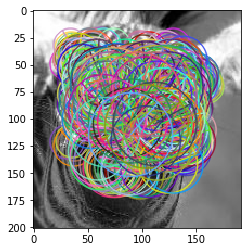

In [25]:
orb_decs = cv2.ORB_create()

keypoints_orb = orb_decs.detect(img)

img_draw = cv2.drawKeypoints(img, keypoints_orb, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_draw)
plt.show()